Modelling

Logistic Regression

In [1]:
#dataframe manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("CleanData.xlsx")
df.head(3)

,Age,GDP,DelayInReporting,AccidentArea_Urban,Sex_Male,Fault_Third Party,BasePolicy_Collision,BasePolicy_Liability,VehicleCategory_Sport,VehicleCategory_Utility,PastNumberOfClaims_2 to 4,PastNumberOfClaims_more than 4,PastNumberOfClaims_none,PoliceReportFiled_Yes,WitnessPresent_Yes,FraudFound_P
0,21,7455,31,1,0,0,0,1,1,0,0,0,1,0,0,0
1,34,7115,0,1,1,0,1,0,1,0,0,0,1,1,0,0
2,47,7455,31,1,1,0,1,0,1,0,0,0,0,0,0,0


In [3]:
print(df.shape)

(15420, 16)


In [4]:
df.dtypes

Age                               int64
GDP                               int64
DelayInReporting                  int64
AccidentArea_Urban                int64
Sex_Male                          int64
Fault_Third Party                 int64
BasePolicy_Collision              int64
BasePolicy_Liability              int64
VehicleCategory_Sport             int64
VehicleCategory_Utility           int64
PastNumberOfClaims_2 to 4         int64
PastNumberOfClaims_more than 4    int64
PastNumberOfClaims_none           int64
PoliceReportFiled_Yes             int64
WitnessPresent_Yes                int64
FraudFound_P                      int64
dtype: object

In [5]:
cols = ['Age', 'GDP', 'DelayInReporting', 'AccidentArea_Urban', 'Sex_Male', 'Fault_Third Party', 'BasePolicy_Collision',
         'BasePolicy_Liability', 'VehicleCategory_Sport', 'VehicleCategory_Utility', 'PastNumberOfClaims_2 to 4',
         'PastNumberOfClaims_more than 4', 'PastNumberOfClaims_none', 'PoliceReportFiled_Yes', 'WitnessPresent_Yes']

In [6]:
#split data into x and y
#also make x into a numpy array so it can be fit onto the model
x =  df[cols].values
x

y = df['FraudFound_P']
y

print(x.shape)
print(y.shape)

(15420, 15)
(15420,)


In [7]:
#hold out validation technique - 70-20-10
#train model on 70, test on 20
from sklearn.model_selection import train_test_split
#test data
x_train, x_test, y_train, y_test =  train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=7, stratify=y)

#after hyperparameter tuning - and after best parameters
x_train, x_valid, y_train, y_valid =  train_test_split(x_train, y_train, train_size=0.9, test_size=0.1, random_state=7)

print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(9714, 15)
(4626, 15)
(1080, 15)
(9714,)
(4626,)
(1080,)


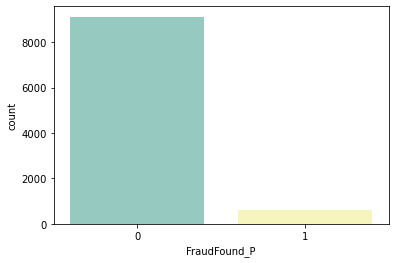

In [8]:
#is the databalanced? - doesnt look like it:(
ax =  sns.countplot(x=y_train, palette="Set3")

In [9]:
#Build model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=10, solver='lbfgs')
logreg.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [10]:
#make predictions
logreg.predict(x_train)
y_pred = logreg.predict(x_train)

#probabilities
pred_proba = logreg.predict_proba(x_train)

logreg.coef_


array([[-1.61833818e-02, -2.15379351e-04, -9.80148174e-04,
        -2.26027754e-02,  4.47536250e-01, -2.51950458e+00,
        -4.22414589e-01, -1.80133655e+00, -5.33978285e-01,
        -1.01194452e-01, -9.71220176e-02, -3.48647364e-02,
         3.35483371e-01, -3.70249324e-01, -5.78068510e-02]])

In [11]:
from sklearn.metrics import classification_report

In [12]:
#evaluate model
#on training set
print("The training Accuracy is: ", logreg.score(x_train, y_train))

#test the model on unseen data - higher accuracy than training data?
print("The test Accuracy is: ", logreg.score(x_test, y_test))

#classification report
print(classification_report(y_train, y_pred))

The training Accuracy is:  0.938851142680667
The test Accuracy is:  0.9401210549070471
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9120
           1       0.00      0.00      0.00       594

    accuracy                           0.94      9714
   macro avg       0.47      0.50      0.48      9714
weighted avg       0.88      0.94      0.91      9714



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
#confusion matrix to show how well the model predicts each class
def plot_confusion_matrix(cm, classes=None, title='Confusion Matrix'):
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

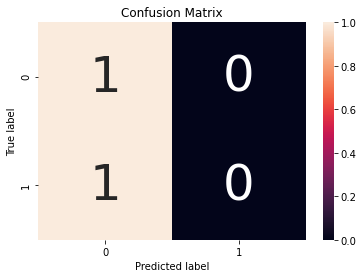

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
cm_norm
#no incorrect predictions? 

plot_confusion_matrix(cm_norm,classes=logreg.classes_, title='Confusion Matrix')

Well, it does make sense that your model predicts always 1. Have a look at your data set: it is severly imbalanced in favor of your positive class. The negative class makes up only ~7% of your data. Try re-balancing your training set or use a cost-sensitive algorithm.



In [15]:
cm

array([[9120,    0],
       [ 594,    0]])

In [22]:
#EVALUATE METRICS
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

#calculate the sensitivity, hit rate, recall or true positive rate
TPR = TP/ (TP + FN)
print("True Positive Rate is:",TPR)

PPV = TP / (TP + FP)
print("Precision is:",PPV)


print("Average TPR is:", TPR.sum()/2)
print("Average PPV is:", PPV.sum()/2)

True Positive Rate is: [1. 0.]
Precision is: [0.93885114        nan]
Average TPR is: 0.5
Average PPV is: nan


<ipython-input-22-bb988e3df232>:11: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP / (TP + FP)


In [25]:
#Log Loss - log loss went down for unseen data. shouldnt be better than training data
from sklearn.metrics import log_loss
print("The log loss on Training is: ", log_loss(y_train,pred_proba))

pred_proba_t = logreg.predict_proba(x_test)

print("The log loss on Test is: ", log_loss(y_test,pred_proba_t))


The log loss on Training is:  0.19739622270085605
The log loss on Test is:  0.19131378706081392


Hyperparameter Training

In [26]:
#regularisation strength - helps to avoid overfitting
#range for c-values
np.geomspace(1e-5, 1e5, num=20)

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

In [27]:
c_list = np.geomspace(1e-5, 1e5, num=20)
CA = []
logarithmic_loss =[]

for c in c_list:
    logreg2 = LogisticRegression(random_state=10, solver='lbfgs',C=c)
    logreg2.fit(x_train, y_train)
    score =  logreg2.score(x_test, y_test)
    CA.append(score)
    print("The classification accuracy of c parameter {} is {}".format(c, score))
    pred_proba_t = logreg2.predict_proba(x_test)
    log_loss2 = log_loss(y_test,pred_proba_t)
    logarithmic_loss.append(log_loss2)
    print("The log loss of c parameter {} is {}".format(c, log_loss2))
    print("")


The classification accuracy of c parameter 1e-05 is 0.9401210549070471
The log loss of c parameter 1e-05 is 0.22637451654144652

The classification accuracy of c parameter 3.359818286283781e-05 is 0.9401210549070471
The log loss of c parameter 3.359818286283781e-05 is 0.22623572739043302

The classification accuracy of c parameter 0.00011288378916846884 is 0.9401210549070471
The log loss of c parameter 0.00011288378916846884 is 0.22572792243374518

The classification accuracy of c parameter 0.000379269019073225 is 0.9401210549070471
The log loss of c parameter 0.000379269019073225 is 0.2239646261713616

The classification accuracy of c parameter 0.0012742749857031334 is 0.9401210549070471
The log loss of c parameter 0.0012742749857031334 is 0.21957569974478455

The classification accuracy of c parameter 0.004281332398719391 is 0.9401210549070471
The log loss of c parameter 0.004281332398719391 is 0.2110030679745923

The classification accuracy of c parameter 0.01438449888287663 is 0.94

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The log loss of c parameter 2636.6508987303555 is 0.1912128171203136

The classification accuracy of c parameter 8858.667904100832 is 0.9401210549070471
The log loss of c parameter 8858.667904100832 is 0.19121291327944018

The classification accuracy of c parameter 29763.51441631313 is 0.9401210549070471
The log loss of c parameter 29763.51441631313 is 0.1905774001317742

The classification accuracy of c parameter 100000.0 is 0.9401210549070471
The log loss of c parameter 100000.0 is 0.19121287610243876



In [32]:
#which parameter should we choose from

CA2 = np.array(CA).reshape(20,)
logarithmic_loss2 = np.array(logarithmic_loss).reshape(20,)

outcomes =  zip(c_list, CA2, logarithmic_loss2)

df_outcomes = pd.DataFrame(outcomes, columns=['C_List', 'CA2', 'LOG LOSS2'])
df_outcomes
df_outcomes.sort_values("LOG LOSS2", ascending=True).reset_index()

,index,C_List,CA2,LOG LOSS2
0,18,29763.514416,0.940121,0.190577
1,15,784.759970,0.940121,0.191161
2,16,2636.650899,0.940121,0.191213
3,19,100000.000000,0.940121,0.191213
4,17,8858.667904,0.940121,0.191213
5,14,233.572147,0.940121,0.191214
6,9,0.545559,0.940121,0.191471
7,8,0.162378,0.940121,0.192179
8,7,0.048329,0.940121,0.194753
9,6,0.014384,0.940121,0.201340


c=18 is the optimal c parameter because it has the lowest logg loss

In [39]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

#Logistic regression
logreg3 = LogisticRegressionCV(cv=kf, random_state=15, Cs=c_list)

logreg3.fit(x_train, y_train)

print("The CA is:", logreg3.score(x_test, y_test))
pred_proba_t = logreg3.predict_proba(x_test)
log_loss3 = log_loss(y_test,pred_proba_t)

print("The Log lOSS is:", log_loss3)


#OPTIMAL PARAMETER 

print("The optimal c is: ", logreg3.C_)

The CA is: 0.9401210549070471
The Log lOSS is: 0.2263540113002629
The optimal c is:  [1.e-05]


The classification accuracy of c parameter 1e-05 is 0.9401210549070471
The log loss of c parameter 1e-05 is 0.22637451654144652



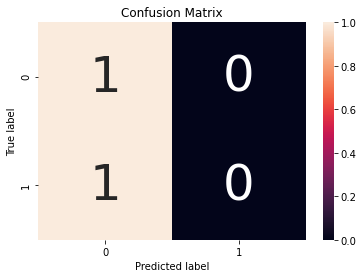

The classification accuracy of c parameter 3.359818286283781e-05 is 0.9401210549070471
The log loss of c parameter 3.359818286283781e-05 is 0.22623572739043302



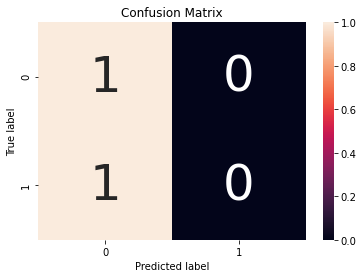

The classification accuracy of c parameter 0.00011288378916846884 is 0.9401210549070471
The log loss of c parameter 0.00011288378916846884 is 0.22572792243374518



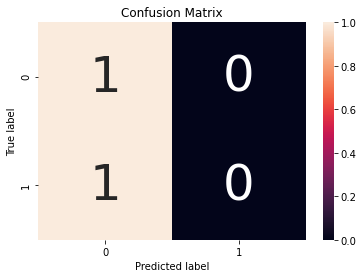

The classification accuracy of c parameter 0.000379269019073225 is 0.9401210549070471
The log loss of c parameter 0.000379269019073225 is 0.2239646261713616



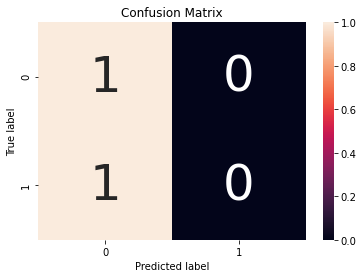

The classification accuracy of c parameter 0.0012742749857031334 is 0.9401210549070471
The log loss of c parameter 0.0012742749857031334 is 0.21957569974478455



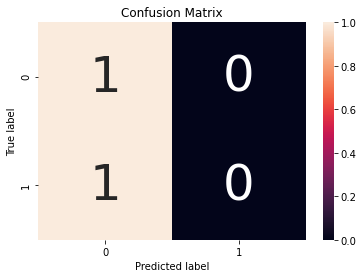

The classification accuracy of c parameter 0.004281332398719391 is 0.9401210549070471
The log loss of c parameter 0.004281332398719391 is 0.2110030679745923



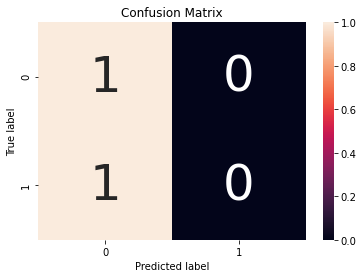

The classification accuracy of c parameter 0.01438449888287663 is 0.9401210549070471
The log loss of c parameter 0.01438449888287663 is 0.20134039096760545



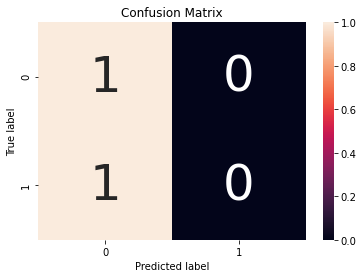

The classification accuracy of c parameter 0.04832930238571752 is 0.9401210549070471
The log loss of c parameter 0.04832930238571752 is 0.1947534481719721



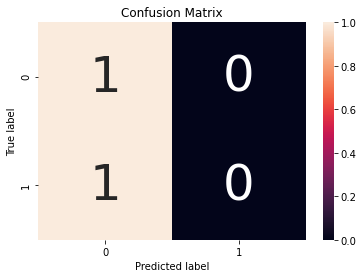

The classification accuracy of c parameter 0.1623776739188721 is 0.9401210549070471
The log loss of c parameter 0.1623776739188721 is 0.19217931576300776



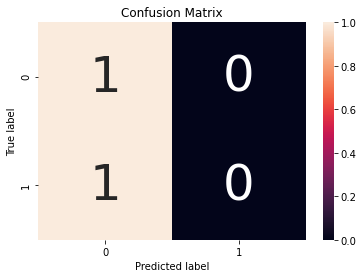

The classification accuracy of c parameter 0.5455594781168515 is 0.9401210549070471
The log loss of c parameter 0.5455594781168515 is 0.1914707285985869



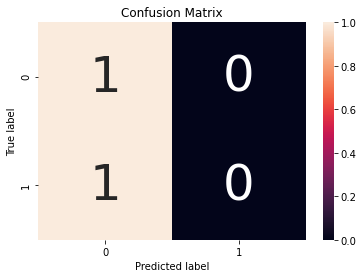

The classification accuracy of c parameter 1.8329807108324339 is 0.9401210549070471
The log loss of c parameter 1.8329807108324339 is 0.20416324358087756



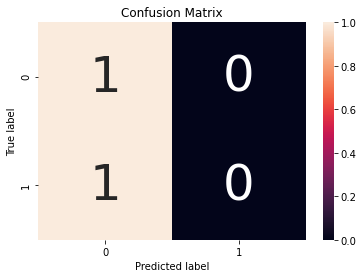

The classification accuracy of c parameter 6.1584821106602545 is 0.9401210549070471
The log loss of c parameter 6.1584821106602545 is 0.20415763078525806



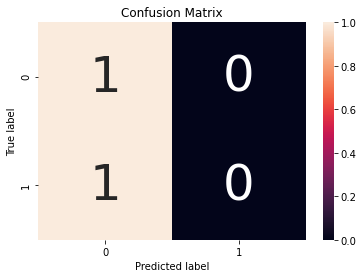

The classification accuracy of c parameter 20.6913808111479 is 0.9401210549070471
The log loss of c parameter 20.6913808111479 is 0.20415606941944753



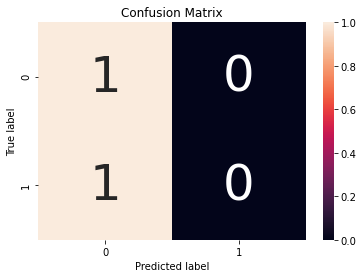

The classification accuracy of c parameter 69.51927961775606 is 0.9401210549070471
The log loss of c parameter 69.51927961775606 is 0.20415561885205172



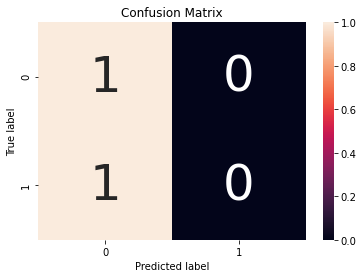

The classification accuracy of c parameter 233.57214690901213 is 0.9401210549070471
The log loss of c parameter 233.57214690901213 is 0.19121353173867905



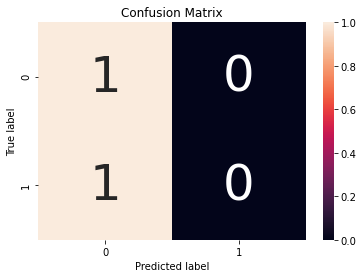

The classification accuracy of c parameter 784.7599703514607 is 0.9401210549070471
The log loss of c parameter 784.7599703514607 is 0.1911605563282614



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


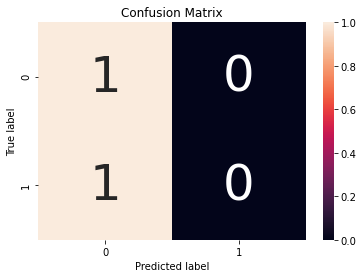

The classification accuracy of c parameter 2636.6508987303555 is 0.9401210549070471
The log loss of c parameter 2636.6508987303555 is 0.1912128171203136



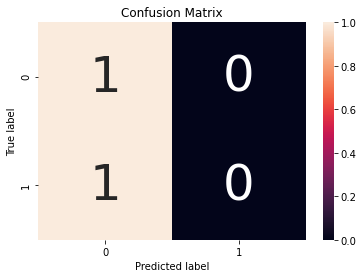

The classification accuracy of c parameter 8858.667904100832 is 0.9401210549070471
The log loss of c parameter 8858.667904100832 is 0.19121291327944018



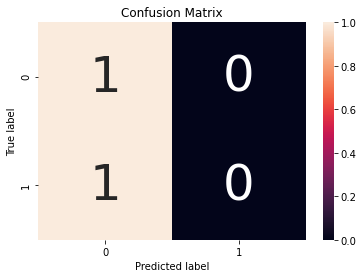

The classification accuracy of c parameter 29763.51441631313 is 0.9401210549070471
The log loss of c parameter 29763.51441631313 is 0.1905774001317742



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


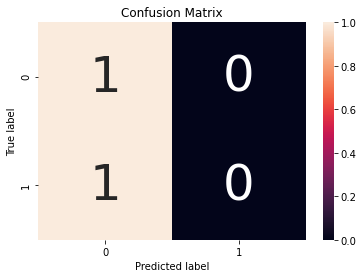

The classification accuracy of c parameter 100000.0 is 0.9401210549070471
The log loss of c parameter 100000.0 is 0.19121287610243876



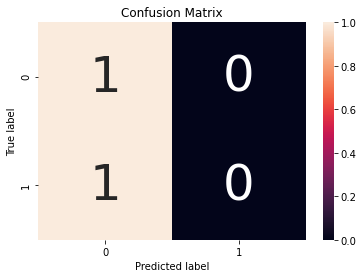

In [40]:
#K-Fold Validation
c_list = np.geomspace(1e-5, 1e5, num=20)
CA = []
logarithmic_loss =[]

for c in c_list:
    logreg2 = LogisticRegression(random_state=10, solver='lbfgs',C=c)
    logreg2.fit(x_train, y_train)
    score =  logreg2.score(x_test, y_test)
    CA.append(score)
    print("The classification accuracy of c parameter {} is {}".format(c, score))
    pred_proba_t = logreg2.predict_proba(x_test)
    log_loss2 = log_loss(y_test,pred_proba_t)
    logarithmic_loss.append(log_loss2)
    print("The log loss of c parameter {} is {}".format(c, log_loss2))
    print("")

    y_pred = logreg2.predict(x_train)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    #no incorrect predictions? 

    plot_confusion_matrix(cm_norm,classes=logreg.classes_, title='Confusion Matrix')
    plt.show()


In [43]:
#Train dummy classifier
from sklearn.dummy import DummyClassifier
dummy_clf =  DummyClassifier(strategy='most_frequent')
dummy_clf.fit(x_train,y_train)
score =  dummy_clf.score(x_test, y_test)

pred_proba_t = dummy_clf.predict_proba(x_test)
log_loss2 = log_loss(y_test,pred_proba_t)

print("Testing Accuracy:", score) 
print("Log Loss:", log_loss2)

Testing Accuracy: 0.9401210549070471
Log Loss: 2.068145495328634


the above double checks the data to ensure the final model is good enough to beat dummy data and predict unseen data

FINAL MODEL

In [44]:
logreg4 = LogisticRegression(random_state=10, solver='lbfgs',C=29763.514416)
logreg4.fit(x_train, y_train)
score =  logreg4.score(x_valid, y_valid)

pred_proba_t = logreg4.predict_proba(x_valid)
log_loss2 = log_loss(y_valid,pred_proba_t)


print("Testing Accuracy:", score) 
print("Log Loss:", log_loss2)

Testing Accuracy: 0.9518518518518518
Log Loss: 0.17038773307335084


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.95 accuracy
0.17 log loss even went down more


good job in avoiding overfitting and generalisations

* can be deployed to help claims analysts analyse if a fraud could be fraudulent

* can help identify which features are seen as the most important for determining whether a claim is likely to be fraudulent

feature importance

Feature: 0, Score: -0.01567
Feature: 1, Score: -0.00022
Feature: 2, Score: -0.00277
Feature: 3, Score: -0.02811
Feature: 4, Score: 0.45864
Feature: 5, Score: -2.53641
Feature: 6, Score: -0.39050
Feature: 7, Score: -1.85079
Feature: 8, Score: -0.63227
Feature: 9, Score: -0.08412
Feature: 10, Score: -0.09640
Feature: 11, Score: -0.05679
Feature: 12, Score: 0.33982
Feature: 13, Score: -0.35927
Feature: 14, Score: -0.05671


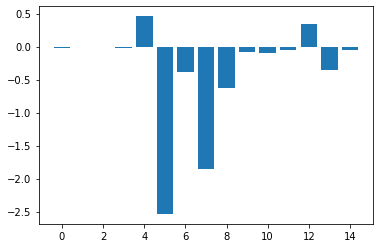

In [54]:
from matplotlib import pyplot

# logistic regression for feature importance
# get importance
importance = logreg4.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Add above to table in report

ROC

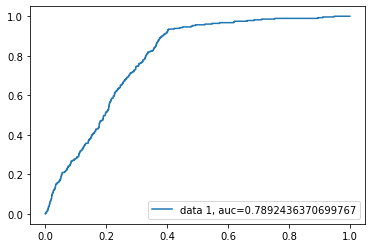

In [49]:
from sklearn import metrics


y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.86. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

In [ ]:
feature_importance = pd.DataFrame(x_train, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

#REDO WITH BALANCED DATA

RandomForest

In [55]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train, y_train)

print(f'model score on training data: {model.score(x_train, y_train)}')
print(f'model score on testing data: {model.score(x_test, y_test)}')

model score on training data: 0.7472378610131134
model score on testing data: -0.09611497874532104


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

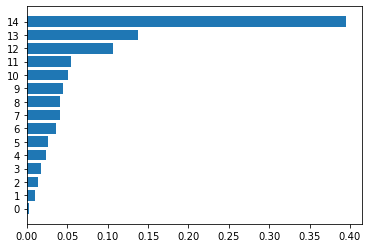

In [56]:
importances = model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])
